<a href="https://colab.research.google.com/github/michaelcerda/Kaggle-Projects/blob/main/Restaurant_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle: Restaurant Revenue Prediction**




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Restaurant Revenue/train.csv.zip')

In [ ]:
train.head()

,Unnamed: 0,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Kfold
0,0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,0.0
1,1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0.0
2,2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0.0
3,3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0.0
4,4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0.0


In [ ]:
train.shape

(137, 45)

In [ ]:
train.dtypes

Unnamed: 0      int64
Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
Kfold         float64
dtype: obj

In [ ]:
# from sklearn import model_selection


# y = train.revenue.values
# kf = model_selection.KFold(n_splits = 5)

# for f, (training, validation) in enumerate(kf.split(X=train, y=y)):
#   train.loc[validation,'Kfold'] = f

# train.to_csv('/content/drive/MyDrive/Restaurant Revenue/train.csv')

### Check for null values

In [ ]:
train_na = train.isnull().sum()/len(train) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending = False)
print('There are {} missing values'.format(len(train_na)))

There are 0 missing values


Count the number of unique values

In [ ]:
train.nunique()

Unnamed: 0    137
Id            137
Open Date     134
City           34
City Group      2
Type            3
P1              8
P2              8
P3              8
P4              6
P5              7
P6              8
P7              6
P8              8
P9              4
P10             4
P11             8
P12             7
P13             5
P14            10
P15             8
P16             9
P17             9
P18             7
P19             9
P20             9
P21             8
P22             5
P23             9
P24             9
P25             8
P26            10
P27             9
P28             9
P29             7
P30             9
P31            10
P32            10
P33             6
P34             8
P35             8
P36             8
P37             8
revenue       137
Kfold           5
dtype: int64

In [ ]:
#Save Id column to train_Id
train_Id = train['Id']
train.drop(['Id'], axis=1, inplace=True)

In [ ]:
train.shape

(137, 44)

In [ ]:
train.value_counts()

Unnamed: 0  Open Date   City        City Group  Type  P1  P2   P3   P4   P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26   P27   P28   P29  P30  P31  P32  P33  P34  P35  P36  P37  revenue     Kfold
136         09/01/2009  İstanbul    Big Cities  FC    4   5.0  3.0  5.0  2   2   5   4   4   5    4    4    5.0  0    0    0    0    0    2    1    1    1    1    0    0    0.0   0.0   3.0   3.0  0    0    0    0    0    0    0    0    6363241.0   4.0      1
42          09/27/2011  İstanbul    Big Cities  IL    12  7.5  6.0  6.0  4   4   10  8   10  10   6    10   7.5  0    0    0    0    0    25   15   6    4    20   0    0    0.0   0.0   7.5   5.0  0    0    0    0    0    0    0    0    4952255.0   1.0      1
48          12/21/2011  Kayseri     Other       FC    4   5.0  4.0  4.0  2   2   5   4   4   5    4    4    5.0  0    0    0    0    0    5    5    3    3    5    0    0    0.0   0.0   4.0   3.0  0    0    0    0    0    0    0 

In [ ]:
train.corr()['revenue'].sort_values(ascending=False)

revenue       1.000000
P2            0.191518
P28           0.155534
P6            0.139094
P21           0.097411
P11           0.084247
P22           0.083562
P1            0.070217
P17           0.067137
P7            0.051165
P23           0.045507
P25           0.036365
P4            0.035685
P19           0.027984
P24           0.014222
P20           0.014147
P14           0.006441
P15           0.000742
Unnamed: 0   -0.006277
P26          -0.007650
P27          -0.013680
P37          -0.019051
P3           -0.024613
P5           -0.028191
P33          -0.032426
P18          -0.034537
P16          -0.037997
Kfold        -0.039947
P31          -0.040418
P35          -0.050156
P9           -0.050352
P36          -0.050534
P12          -0.062193
P32          -0.065857
P30          -0.066203
P34          -0.072343
P10          -0.073220
P8           -0.084215
P13          -0.105085
P29          -0.114846
Name: revenue, dtype: float64

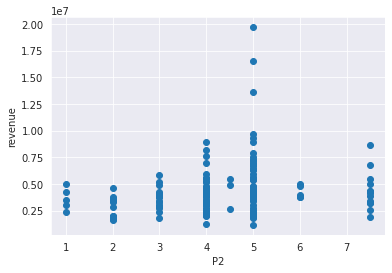

In [ ]:
sns.set_style('darkgrid')
fig,ax = plt.subplots()
ax.scatter(x = train['P2'], y = train['revenue'])
plt.xlabel('P2')
plt.ylabel('revenue')
plt.show()

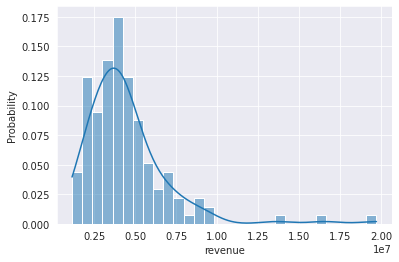

In [ ]:
sns.histplot(train['revenue'], stat = 'probability', bins = 30, kde = True)
plt.show()

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# cols = ('City', 'City Group', 'Type')

# for c in cols:
#   le = LabelEncoder()
#   le.fit(list(train[c].values))
#   train[c] = le.transform(list(train[c].values))


In [ ]:
train.head()

,Unnamed: 0,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Kfold
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,0.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0.0


In [ ]:
import datetime

train['date'] = pd.to_datetime(train['Open Date'])
train.drop(['Open Date'], axis = 1, inplace = True)
train.head()

,Unnamed: 0,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Kfold,date
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,0.0,1999-07-17
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0.0,2008-02-14
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0.0,2013-03-09
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0.0,2012-02-02
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0.0,2009-05-09


In [ ]:
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

train.drop(['date'],axis = 1, inplace = True)

In [ ]:
train
train.head()

,Unnamed: 0,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Kfold,day,month,year
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,0.0,17,7,1999
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0.0,14,2,2008
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0.0,9,3,2013
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0.0,2,2,2012
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0.0,9,5,2009


In [ ]:
target = train['revenue']
train.drop(['revenue'],axis = 1, inplace = True)
# df = train.values

In [ ]:
train.shape

(137, 45)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Restaurant Revenue/test.csv.zip')

In [ ]:
test.shape

(100000, 42)

In [ ]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
test_Id = test['Id']
test.drop('Id', axis = 1, inplace=True)

In [ ]:
test.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
test_na = test.isnull().sum()/len(test) * 100
test_na = test_na.drop(test_na[test_na ==0].index).sort_values(ascending=False)
print('There are {} missing values'.format(len(test_na)))

There are 0 missing values


In [ ]:
test['date'] = pd.to_datetime(test['Open Date'])
test.drop(['Open Date'], axis=1, inplace = True)


In [ ]:
test.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,date
0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2011-01-22
1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2011-03-18
2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2013-10-30
3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,2013-05-06
4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,2013-07-31


In [ ]:
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

In [ ]:
test.drop('date', axis = 1, inplace = True)

In [ ]:
test.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,day,month,year
0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,22,1,2011
1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,18,3,2011
2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,30,10,2013
3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,6,5,2013
4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,31,7,2013


In [ ]:
#Save the number of rows for each dataset
len_train = train.shape[0]
len_test = test.shape[0]

In [ ]:
#Let's combine the train and test datasets prior to OHE
data = pd.concat((train,test)).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

ohe_cols = pd.DataFrame(enc.fit_transform(data[['City', 'City Group', 'Type']]).toarray())

data = data.join(ohe_cols)

data.drop(['City', 'City Group', 'Type'], axis = 1, inplace = True)

In [ ]:
#Let's split 'data' back tp train and test
train = data[:len_train]
test = data[len_train:]

In [ ]:
print('Train Shape: {}'.format(train.shape))
print('Test Shape: {}'.format(test.shape))

Train Shape: (137, 111)
Test Shape: (100000, 111)


In [ ]:
pip install scikit-optimize

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X_train, X_val, y_train, y_val = train_test_split(train,target, test_size = 0.7)

# reg = RandomForestRegressor(n_estimators = 100)
# reg.fit(X_train,y_train)
# preds = reg.predict(X_val)

# metrics.mean_squared_error(y_val, preds)

In [ ]:
import lightgbm as lgb

reg_lgb = lgb.LGBMRegressor(n_estimators = 2000)
reg_lgb.fit(X_train,y_train)
preds = reg_lgb.predict(X_val)

metrics.mean_squared_error(y_val, preds, squared = False)

2645479.3769207704

In [ ]:
# def optimize(params, param_names, x, y):
#   params = dict(zip(param_names, params))
#   model = lgb.LGBMRegressor(**params)
#   kf = model_selection.KFold(n_splits = 5)
#   accuracies = []
#   for idx in kf.split(X=x, y=y):
#     train_idx, test_idx = idx[0], idx[1]
#     xtrain = x.iloc[train_idx]
#     ytrain = y.iloc[train_idx]

#     xtest = x.iloc[test_idx]
#     ytest = y.iloc[test_idx]

#     model.fit(xtrain, ytrain)
#     preds = model.predict(xtest)
#     fold_acc = metrics.mean_squared_error(ytest, preds, squared = False)
#     accuracies.append(fold_acc)

#   return np.mean(accuracies)

In [ ]:
# from functools import partial
# from skopt import space
# from skopt import gp_minimize
# from sklearn import model_selection
# from skopt import callbacks
# from skopt.callbacks import CheckpointSaver
# from scipy.stats import uniform as sp_uniform

# checkpoint_saver = CheckpointSaver("./checkpoint.pkl", compress = 9)

# param_space = [
#                space.Categorical(['regression'], name = 'objective'),
#                space.Integer(100,5000, name = 'n_estimators'),
#                space.Integer(2,100, name = 'num_leaves'),
#                space.Integer(1,50, name = 'min_data_in_leaf'),
#                space.Integer(1,25, name = 'max_depth'),
#                space.Real(0.0001, 0.1, name = 'learning_rate'),
#                space.Real(0.01, 0.99, name = 'bagging_fraction'),
#                space.Integer(1,20, name = 'bagging_freq'),
#                space.Integer(1,10, name = 'bagging_seed'),
#                space.Integer(2,100, name = 'max_bin'),
#                space.Real(0.01, 0.99, name = 'feature_fraction'),
#                space.Integer(1, 10, name = 'feature_fraction_seed'),
#                space.Integer(1, 20, name = 'min_sum_hessian_in_leaf')
# ]

# param_names = [
#                'objective',
#                'n_estimators',
#                'num_leaves',
#                'min_data_in_leaf',
#                'max_depth',
#                'learning_rate',
#                'bagging_fraction',
#                'bagging_freq',
#                'bagging_seed',
#                'max_bin',
#                'feature_fraction',
#                'feature_fraction_seed',
#                'min_sum_hessian_in_leaf'
# ]

# optimization_function = partial(
#     optimize,
#     param_names = param_names,
#     x=train,
#     y=target
# )

# result = gp_minimize(
#     optimization_function,
#     dimensions = param_space,
#     n_calls = 50,
#     n_random_starts = 10,
#     n_jobs = -1,
#     callback = [checkpoint_saver],
#     random_state = 123,
#     verbose = True,
# )

In [ ]:
# from skopt import load

# result = load('./checkpoint.pkl')

# print("""Best parameters:
# objective=%s,
# n_estimators = %d,
# num_leaves=%d,
# min_data_in_leaf=%d,
# max_depth=%d,
# learning_rate=%.6f,
# bagging_fraction=%f,
# bagging_freq=%d,
# bagging_seed=%d,
# max_bin=%d,
# feature_fraction=%f,
# feature_fraction_seed=%d,
# min_sum_hessian_in_leaf=%d
# """ % (result.x[0], result.x[1],result.x[2], result.x[3],result.x[4],result.x[5],result.x[6],
#         result.x[7],result.x[8],result.x[9],result.x[10],result.x[11],result.x[12])
# )

In [ ]:
reg_lgb = lgb.LGBMRegressor(objective='regression',
n_estimators=478,
num_leaves=44,
min_data_in_leaf=12,
max_depth=6,
learning_rate=0.085228,
bagging_fraction=0.833955,
bagging_freq=9,
bagging_seed=10,
max_bin = 3,
feature_fraction=0.058470,
feature_fraction_seed=6,
min_sum_hessian_in_leaf=15)
reg_lgb.fit(train,target)

LGBMRegressor(bagging_fraction=0.833955, bagging_freq=9, bagging_seed=10,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.05847, feature_fraction_seed=6,
              importance_type='split', learning_rate=0.085228, max_bin=3,
              max_depth=6, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=12, min_split_gain=0.0,
              min_sum_hessian_in_leaf=15, n_estimators=478, n_jobs=-1,
              num_leaves=44, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor

# def optimize_xgb(params, param_names, x, y):
#   params = dict(zip(param_names, params))
#   model = GradientBoostingRegressor(**params)
#   kf = model_selection.KFold(n_splits = 5)
#   accuracies = []
#   for idx in kf.split(X=x,y=y):
#     train_idx, test_idx = idx[0], idx[1]
#     xtrain = x.iloc[train_idx]
#     ytrain = y.iloc[train_idx]

#     xtest = x.iloc[test_idx]
#     ytest = y.iloc[test_idx]

#     model.fit(xtrain, ytrain)
#     preds = model.predict(xtest)
#     fold_acc = metrics.mean_squared_error(ytest, preds, squared = False)
#     accuracies.append(fold_acc)

#   return np.mean(accuracies)

In [ ]:
# from functools import partial
# from skopt import space
# from skopt import gp_minimize
# from sklearn import model_selection
# from skopt import callbacks
# from skopt.callbacks import CheckpointSaver

# checkpoint_saver = CheckpointSaver("./checkpoint.pkl", compress = 9)

# param_space = [
#                space.Integer(3, 15, name = 'max_depth'),
#                space.Real(0.01, 0.1, name = 'learning_rate'),
#                space.Integer(1000,4000, name = 'n_estimators'),
#                space.Integer(2, 10, name = 'min_samples_split'),
#                space.Integer(2, 10, name = 'min_samples_leaf'),
#                space.Categorical(['ls','lad','huber'], name = 'loss'),
#                space.Categorical(['auto', 'sqrt', 'log2'], name = 'max_features'),
#                space.Categorical(['friedman_mse', 'mse', 'mae'], name = 'criterion')
# ]

# param_names = [
#                'max_depth',
#                'learning_rate',
#                'n_estimators',
#                'min_samples_split',
#                'min_samples_leaf',
#                'loss',
#                'max_features',
#                'criterion'
# ]

# optimization_function = partial(
#     optimize_xgb,
#     param_names = param_names,
#     x=train,
#     y=target
# )

# result = gp_minimize(
#     optimization_function,
#     dimensions = param_space,
#     n_calls = 10,
#     n_random_starts = 10,
#     n_jobs = -1,
#     callback = [checkpoint_saver],
#     random_state = 123,
#     verbose = True,
# )

In [ ]:
# from skopt import load

# result = load('./checkpoint.pkl')

# print("""Best parameters:
# max_depth=%d,
# learning_rate=%.6f,
# n_estimators=%d,
# min_samples_split=%d,
# min_samples_leaf=%d,
# loss=%s,
# max_features=%s,
# criterion=%s
# """  % (result.x[0], result.x[1],result.x[2], result.x[3],result.x[4],result.x[5],result.x[6],
#         result.x[7],
#                       ))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg_gbr = GradientBoostingRegressor(max_depth=5,
learning_rate=0.038347,
n_estimators=3673,
min_samples_split=3,
min_samples_leaf=6,
loss='huber',
max_features='log2',
criterion='friedman_mse')
reg_gbr.fit(train,target)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.038347, loss='huber',
                          max_depth=5, max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=3673,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbr_preds = reg_gbr.predict(test)

ValueError: ignored

In [ ]:
# import xgboost as xgb
# from sklearn import metrics

# def optimize_xgb(params, param_names, x,y):
#   params = dict(zip(param_names, params))
#   model = xgb.XGBRegressor(**params)
#   kf = model_selection.KFold(n_splits = 5)
#   accuracies = []
#   for idx in kf.split(X=x,y=y):
#     train_idx, test_idx = idx[0], idx[1]
#     xtrain = x.iloc[train_idx]
#     ytrain = y.iloc[train_idx]

#     xtest = x.iloc[test_idx]
#     ytest = y.iloc[test_idx]

#     model.fit(xtrain,ytrain)
#     preds = model.predict(xtest)
#     fold_acc = metrics.mean_squared_error(ytest, preds, squared = False)
#     accuracies.append(fold_acc)

#   return np.mean(accuracies)

In [ ]:
# from functools import partial
# from skopt import space
# from skopt import gp_minimize
# from sklearn import model_selection
# from skopt import callbacks
# from skopt.callbacks import CheckpointSaver
# from scipy.stats import uniform as sp_uniform
# checkpoint_saver = CheckpointSaver("./checkpoint.pkl", compress = 9)

# param_space = [
#                space.Real(0,1, name = 'colsample_bytree'),
#                space.Real(0,1, name = 'gamma'),
#                space.Real(0,1, name = 'learning_rate'),
#                space.Integer(1,20, name = 'max_depth'),
#                space.Real(1,5, name = 'min_child_weight'),
#                space.Integer(100,3000, name = 'n_estimators'),
#                space.Real(0,1, name = 'reg_alpha'),
#                space.Real(0,1, name = 'reg_lambda'),
#                space.Real(0,1, name = 'subsample')
# ]

In [ ]:
# param_names = [
#                'colsample_bytree',
#                'gamma',
#                'learning_rate',
#                'max_depth',
#                'min_child_weight',
#                'n_estimators',
#                'reg_alpha',
#                'reg_lambda',
#                'subsample'
# ]

# optimization_function = partial(
#     optimize_xgb,
#     param_names = param_names,
#     x=train,
#     y=target
# )

# result = gp_minimize(
#     optimization_function,
#     dimensions = param_space,
#     n_calls = 50,
#     n_random_starts = 10,
#     n_jobs = -1,
#     callback = [checkpoint_saver],
#     random_state = 123,
#     verbose = True,
# )

In [ ]:
# from skopt import load

# result = load('./checkpoint.pkl')

# print("""Best parameters:
# colsample_bytree = %f,
# gamma = %f,
# learning_rate = %f,
# max_depth = %d,
# min_child_weight = %f,
# n_estimators = %d,
# reg_alpha = %f,
# reg_lambda = %f,
# subsample = %f
# """ % (result.x[0], result.x[1], result.x[2], result.x[3], result.x[4], result.x[5], result.x[6], result.x[7], result.x[8])
# )


In [ ]:
import xgboost as xgb

reg_xgb = xgb.XGBRegressor(colsample_bytree=0.909769,
gamma=0.218376,
learning_rate=0.363104,
max_depth=17,
min_child_weight=3.845567,
n_estimators=1240,
reg_alpha=0.231301,
reg_lambda = 0.380175,
subsample = 0.549162
)

reg_xgb.fit(train,target)

In [ ]:
estimators = [
              ('gbr',GradientBoostingRegressor(max_depth=5,
learning_rate=0.038347,
n_estimators=3673,
min_samples_split=3,
min_samples_leaf=6,
loss='huber',
max_features='log2',
criterion='friedman_mse')),
              ('xgb',xgb.XGBRFRegressor(colsample_bytree=0.909769,
gamma=0.218376,
learning_rate=0.363104,
max_depth=17,
min_child_weight=3.845567,
n_estimators=1240,
reg_alpha=0.231301,
reg_lambda = 0.380175,
subsample = 0.549162)),
              ('lgb',lgb.LGBMRegressor(objective='regression',
n_estimators=478,
num_leaves=44,
min_data_in_leaf=12,
max_depth=6,
learning_rate=0.085228,
bagging_fraction=0.833955,
bagging_freq=9,
bagging_seed=10,
max_bin = 3,
feature_fraction=0.058470,
feature_fraction_seed=6,
min_sum_hessian_in_leaf=15))
]

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

reg = StackingRegressor(
    estimators = estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=123)
)

In [ ]:
reg.fit(train,target)

In [ ]:
stack_preds = reg.predict(test)

In [ ]:
lgb_preds = reg_lgb.predict(test)

In [ ]:
xgb_preds = reg_xgb.predict(test)

In [ ]:
from scipy.optimize import fmin

kf = model_selection.KFold(n_splits = 5)

class optimize_weights:
  def __init__(self):
    self.coef = 0

  def _mse(self, X, y):
    x_coef = X * coef
    predictions = np.sum(x_coef, axis = 1)
    mse = metrics.mean_squared_error(y, predictions, squared = False)

  def fit(self, X, y):
    partial_loss = partial(self._mse, X=X, y=y)
    init_coef = np.random.dirichlet(np.ones(X.shape[1]))
    self.coef_ = fmin(partial_loss, init_coef, disp=True)

  def predict(self, X):
    predictions = np.sum(x_coef, axis=1)
    return predictions

  def run_training(pred_df, fold):
    train_df = pred_df[:50000].reset_index(drop=True)
    valid_df = pred_df[50000:].reset_index(drop=True)

    xtrain= train_df[['lgb_preds', 'gbr_preds', 'xgb_preds', 'stack_preds']].values
    xvalid= valid_df[['lgb_preds', 'gbr_preds', 'xgb_preds', 'stack_preds']].values

    opt = optimize_weights()
    opt.fit(xtrain, train_df.values)
    preds = opt.predict(xvalid)
    mse = metrics.mean_squared_error(valid_df.values, preds,squared = False)
    print("{fold}, {mse}")

In [ ]:
optw = optimize_weights()

for j in range(5):
  optw.run_training(j)

In [ ]:
# ensemble = lgb_preds*(0.5) + gbr_preds*(0.2) + xgb_preds*(0.15) + stack_preds*(0.15)

In [ ]:
# preds = reg_lgb.predict(test)

In [ ]:
# output = pd.DataFrame({'Id': test_Id, 'Prediction': ensemble})
# output.to_csv('submission.csv', index = False)